In [1]:
import pandas as pd

In [7]:
df = df = pd.read_csv(r'C:\Users\HP\Downloads\Telco-Customer-Churn.csv')

missing_values = df.isnull().sum()
print(missing_values)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


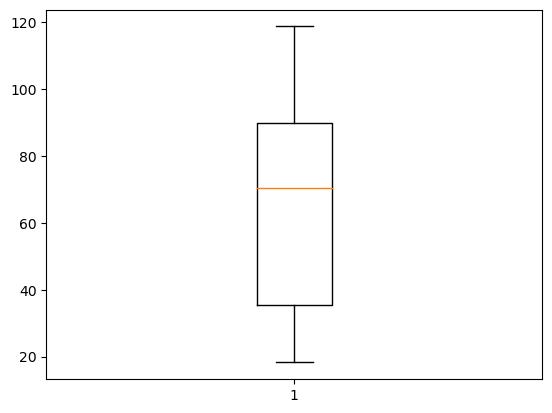

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(df['MonthlyCharges'])
plt.show()

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

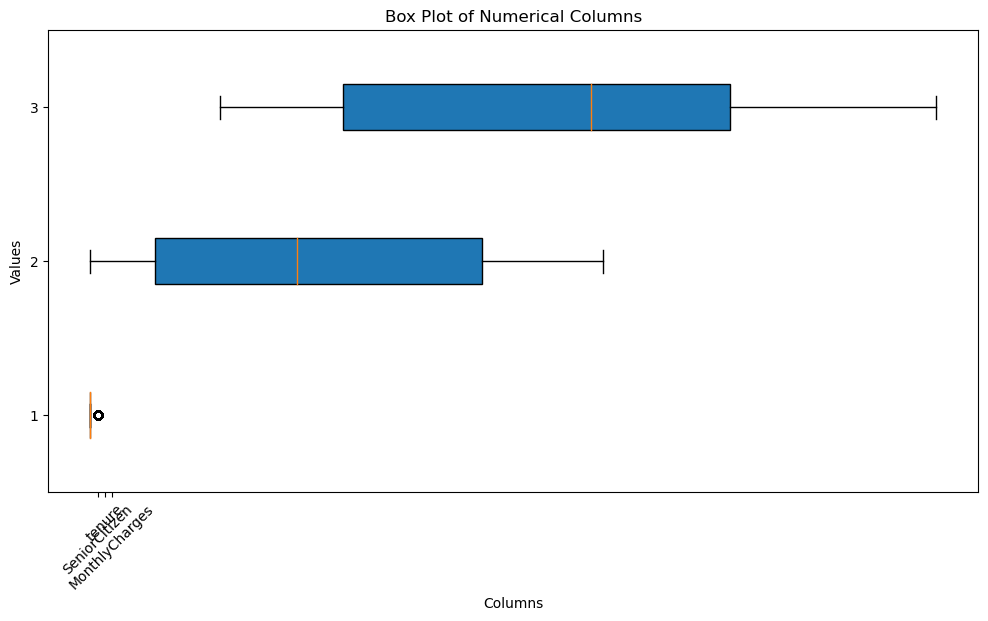

In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.boxplot(numerical_columns.values, vert=False, patch_artist=True)
plt.xticks(range(1, len(numerical_columns.columns) + 1), numerical_columns.columns, rotation=45)
plt.title("Box Plot of Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [22]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
import pandas as pd
df = df = pd.read_csv(r'C:\Users\HP\Downloads\Telco-Customer-Churn.csv')
df_encoded = pd.get_dummies(df, columns=['gender'])

In [6]:
import pandas as pd
df = pd.read_csv(r'C:\Users\HP\Downloads\Telco-Customer-Churn.csv')
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,29.85,29.85,No,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,56.95,1889.5,No,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,53.85,108.15,Yes,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,42.30,1840.75,No,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,70.70,151.65,Yes,...,0,1,0,0,0,1,0,0,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[['tenure']] = scaler.fit_transform(df_encoded[['tenure']])

In [12]:
descriptive_stats = df_encoded.describe()
print(descriptive_stats)

       SeniorCitizen       tenure  MonthlyCharges  MultipleLines_No  \
count    7043.000000  7043.000000     7043.000000       7043.000000   
mean        0.162147     0.449599       64.761692          0.481329   
std         0.368612     0.341104       30.090047          0.499687   
min         0.000000     0.000000       18.250000          0.000000   
25%         0.000000     0.125000       35.500000          0.000000   
50%         0.000000     0.402778       70.350000          0.000000   
75%         0.000000     0.763889       89.850000          1.000000   
max         1.000000     1.000000      118.750000          1.000000   

       MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
count                     7043.000000        7043.000000          7043.000000   
mean                         0.096834           0.421837             0.343746   
std                          0.295752           0.493888             0.474991   
min                          0.00000

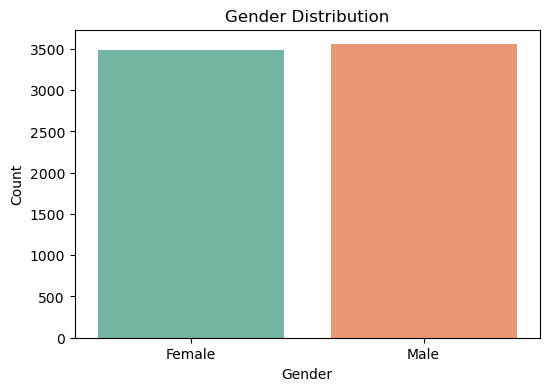

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt  

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

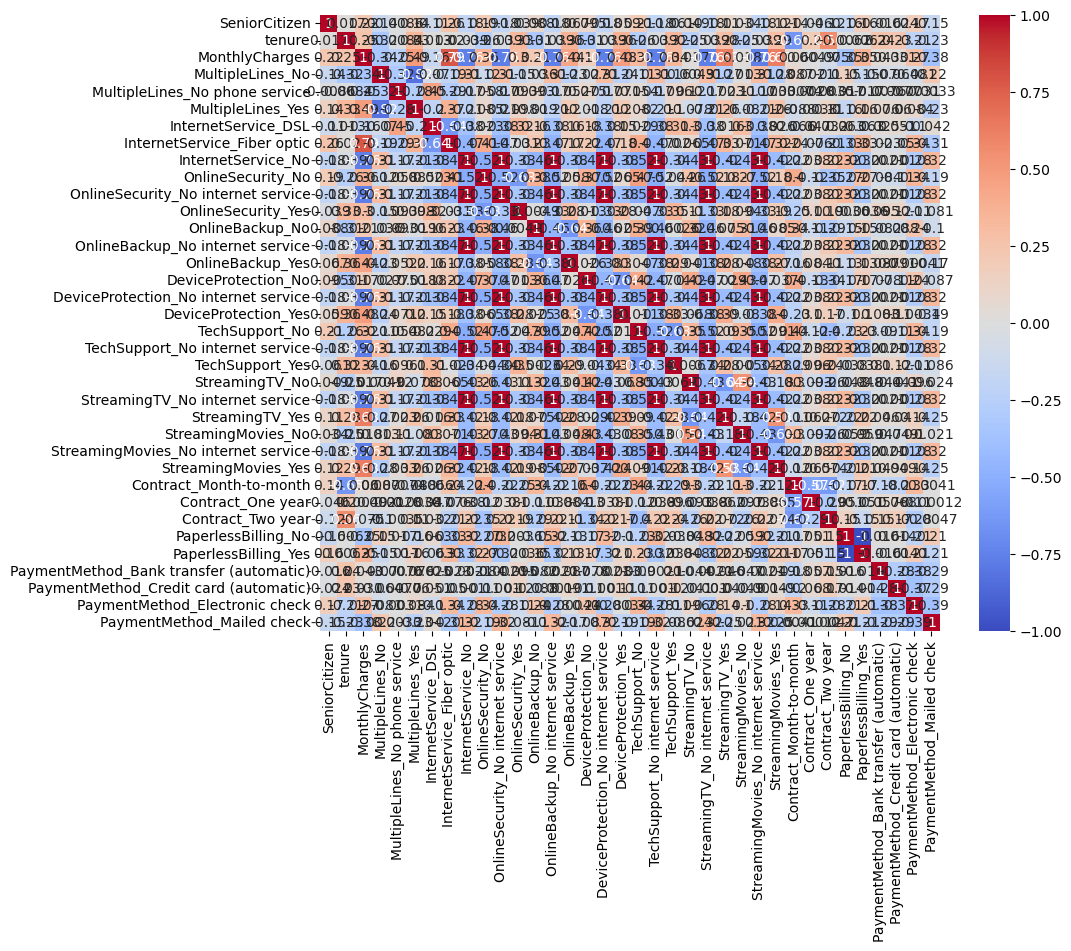

In [22]:
correlation_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
import pandas as pd
from scipy import stats

In [24]:
churned = df[df['Churn'] == 'Yes']
non_churned = df[df['Churn'] == 'No']

In [25]:
t_stat, p_value = stats.ttest_ind(churned['MonthlyCharges'], non_churned['MonthlyCharges'])

In [26]:
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')
if p_value < 0.05:
    print('There is a statistically significant difference between MonthlyCharges for churned and non-churned customers.')
else:
    print('There is no statistically significant difference between MonthlyCharges for churned and non-churned customers.')

T-Statistic: 16.536738015936308
P-Value: 2.7066456068884154e-60
There is a statistically significant difference between MonthlyCharges for churned and non-churned customers.


In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [40]:
contract_summary = df.groupby('Contract').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std', 'count'],
    'Churn': 'size'  
})

In [42]:
contract_summary.columns = ['AvgMonthlyCharges', 'MedianMonthlyCharges', 'StdMonthlyCharges', 'TotalMonthlyCharges',
                            'AvgTotalCharges', 'MedianTotalCharges', 'StdTotalCharges', 'TotalCustomers', 'TotalChurned']

In [43]:
contract_summary['ChurnRate'] = (contract_summary['TotalChurned'] / contract_summary['TotalCustomers']) * 100
print("Summary by Contract Type:")
print(contract_summary)

Summary by Contract Type:
                AvgMonthlyCharges  MedianMonthlyCharges  StdMonthlyCharges  \
Contract                                                                     
Month-to-month          66.398490                 73.25          26.926599   
One year                65.048608                 68.75          31.840539   
Two year                60.770413                 64.35          34.678865   

                TotalMonthlyCharges  AvgTotalCharges  MedianTotalCharges  \
Contract                                                                   
Month-to-month                 3875      1369.254581              679.55   
One year                       1473      3034.683084             2657.55   
Two year                       1695      3728.933947             3623.95   

                StdTotalCharges  TotalCustomers  TotalChurned   ChurnRate  
Contract                                                                   
Month-to-month      1613.879008            3875   

In [44]:
payment_method_summary = df.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std', 'count'],
    'Churn': ['sum', 'count']
})

In [50]:
payment_method_summary = df.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std', 'count'],
    'Churn': ['sum', 'count']
})

In [51]:
payment_method_summary.columns = ['AvgMonthlyCharges', 'MedianMonthlyCharges', 'StdMonthlyCharges', 
                                 'CountMonthlyCharges', 'AvgTotalCharges', 'MedianTotalCharges', 
                                 'StdTotalCharges', 'CountTotalCharges', 'TotalChurned', 'TotalCustomers']

In [59]:
payment_method_summary['TotalChurned'] = pd.to_numeric(payment_method_summary['TotalChurned'], errors='coerce')
payment_method_summary['TotalCustomers'] = pd.to_numeric(payment_method_summary['TotalCustomers'], errors='coerce')

In [60]:
payment_method_summary['ChurnRate'] = (payment_method_summary['TotalChurned'] / payment_method_summary['TotalCustomers']) * 100

In [61]:
payment_method_summary['ChurnRate'] = payment_method_summary['ChurnRate'].fillna(0)

In [62]:
print("\nSummary by Payment Method:")
print(payment_method_summary)


Summary by Payment Method:
                           AvgMonthlyCharges  MedianMonthlyCharges  \
PaymentMethod                                                        
Bank transfer (automatic)          67.192649                73.100   
Credit card (automatic)            66.512385                73.025   
Electronic check                   76.255814                80.550   
Mailed check                       43.917060                34.700   

                           StdMonthlyCharges  CountMonthlyCharges  \
PaymentMethod                                                       
Bank transfer (automatic)          30.555200                 1544   
Credit card (automatic)            30.612424                 1522   
Electronic check                   24.053655                 2365   
Mailed check                       26.314665                 1612   

                           AvgTotalCharges  MedianTotalCharges  \
PaymentMethod                                                    
Bank

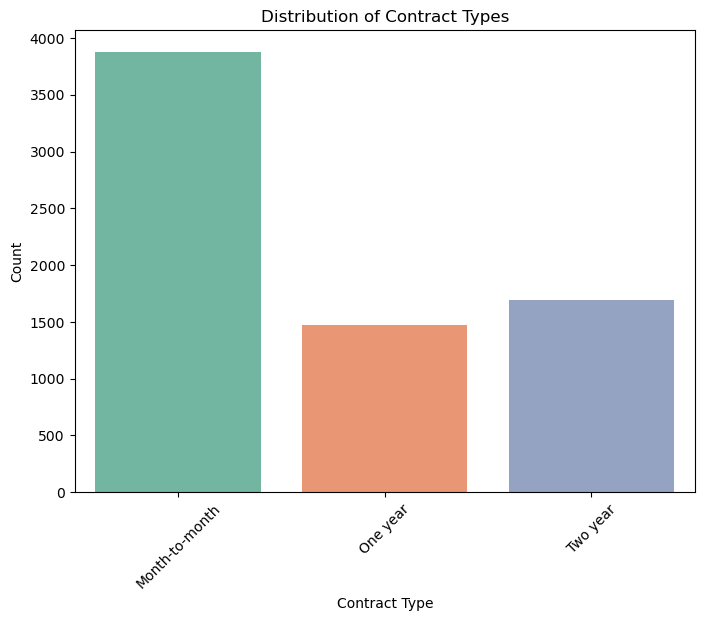

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', palette='Set2')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

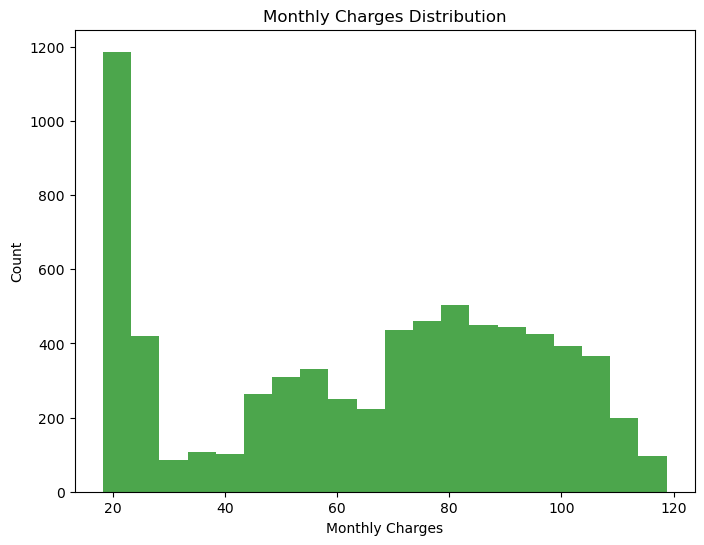

In [64]:
plt.figure(figsize=(8, 6))
plt.hist(df['MonthlyCharges'], bins=20, color='green', alpha=0.7)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

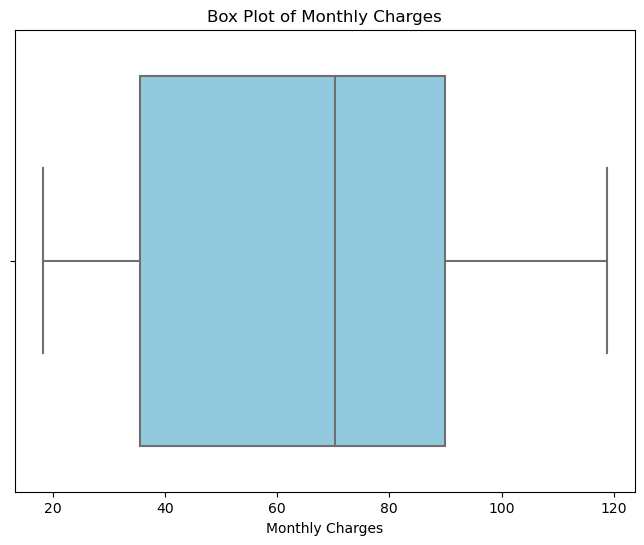

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='MonthlyCharges', data=df, color='skyblue')
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()


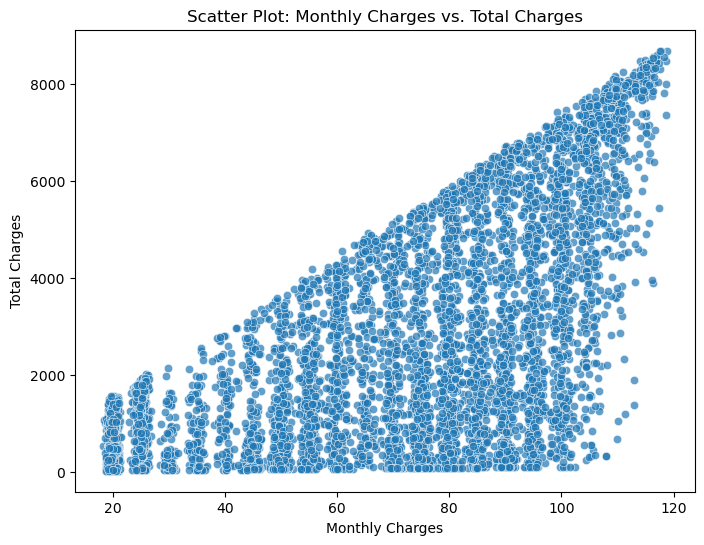

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, alpha=0.7)
plt.title('Scatter Plot: Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

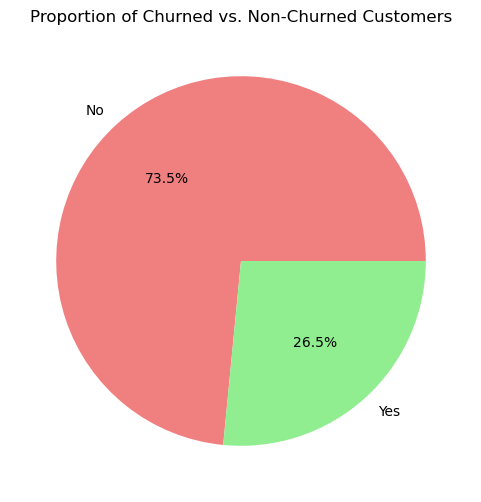

In [69]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.show()

In [1]:
from IPython.display import display, HTML

display(HTML("<script>Jupyter.notebook.kernel.execute('plt.savefig(\"plot_name.png\")')</script>"))

In [6]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
plt.title('Proportion of Churned vs. Non-Churned Customers')

plt.savefig('proportion_plot.png')
plt.savefig('proportion_plot.pdf')

plt.savefig('C:/Users/HP/Downloads/Telcom_plot.png')
plt.close()

In [7]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
plt.title('Scatter Plot: Monthly Charges vs. Total Charges')

plt.savefig('Scatter_plot.png')
plt.savefig('Scatter_plot.pdf')

plt.savefig('C:/Users/HP/Downloads/Telcom_plot.png')
plt.close()

In [8]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
plt.title('Box Plot of Monthly Charges')

plt.savefig('Boxplot_plot.png')
plt.savefig('Boxplot_plot.pdf')

plt.savefig('C:/Users/HP/Downloads/Telcom_plot.png')
plt.close()

In [9]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
plt.title('Monthly Charges Distribution')

plt.savefig('Monthly Charges Distribution.png')
plt.savefig('Monthly Charges Distribution.pdf')

plt.savefig('C:/Users/HP/Downloads/Telcom_plot.png')
plt.close()

In [10]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
plt.title('Distribution of Contract Types')

plt.savefig('Distribution of Contract Types.png')
plt.savefig('Distribution of Contract Types.pdf')

plt.savefig('C:/Users/HP/Downloads/Telcom_plot.png')
plt.close()

In [11]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
plt.title('Gender Distribution')

plt.savefig('Gender Distribution.png')
plt.savefig('Gender Distribution.pdf')

plt.savefig('C:/Users/HP/Downloads/Telcom_plot.png')
plt.close()